Momentum factor backtesting: Naive-momentum, Rebalancing-12M

In [1]:
import os

os.chdir('/home/hyunjun/workspace/backtester')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [3]:
universe = pd.read_csv('data/price.csv', index_col=0)

In [12]:
return_1m = universe.pct_change()
return_1m

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-31,-0.036780,-0.085938,-0.015723,-0.092348,0.001030,0.011236,0.001535,-0.010975,0.026583,-0.048939,...,-0.093917,-0.008034,-0.078580,0.047050,-0.046655,-0.062039,0.074419,-0.005271,-0.128958,-0.008724
1981-02-28,-0.025216,-0.012821,0.029819,-0.102315,0.015733,0.000000,0.002810,-0.024120,-0.016637,-0.062083,...,-0.072348,-0.034846,-0.019257,0.056348,-0.012927,0.029961,-0.073593,0.016958,-0.007979,-0.091309
1981-03-31,-0.038433,-0.064935,0.025853,-0.004139,-0.020701,0.042735,-0.040000,0.014505,-0.087139,0.009063,...,0.024747,-0.043130,-0.099579,0.024983,0.020892,-0.028135,0.015020,0.030224,-0.008043,0.066586
1981-04-30,-0.036895,-0.074074,-0.026210,-0.107417,0.034442,0.006557,0.008227,-0.062450,-0.085842,-0.002085,...,-0.037688,-0.007138,0.052960,0.020422,-0.000611,-0.020118,0.025321,0.064239,0.016216,-0.040863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-0.001132,0.000000,0.038380,-0.054259,0.049716,0.011998,-0.050460,0.013840,0.012036,0.024913,...,0.049970,0.041412,0.000000,0.003378,0.000000,0.024297,0.041565,0.011790,0.092617,0.075758
2019-09-30,0.015861,0.000000,0.028369,0.044177,-0.039794,-0.054783,0.006402,-0.037097,0.013875,0.058317,...,-0.003154,-0.000978,0.000000,-0.004897,0.000000,-0.007835,-0.036217,-0.010721,-0.006297,0.020756
2019-10-31,-0.055019,0.000000,-0.031300,-0.028297,-0.016004,0.004325,-0.032633,0.001041,-0.013685,-0.067875,...,-0.058096,-0.009135,0.000000,0.026761,0.000000,-0.104652,-0.012031,-0.092631,-0.009749,-0.055192
2019-11-30,0.007474,0.000000,0.038198,0.047781,0.074250,0.042205,0.050414,0.064410,0.027750,0.020552,...,-0.023817,0.051696,0.000000,0.031456,0.000000,-0.047287,-0.058675,0.077578,0.034211,-0.020753


In [13]:
rank_data = return_1m.rank(axis=1, method='first', ascending=False)
rank_data

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-31,12.0,18.0,11.0,19.0,6.0,4.0,5.0,10.0,3.0,14.0,...,20.0,8.0,17.0,2.0,13.0,16.0,1.0,7.0,21.0,9.0
1981-02-28,15.0,10.0,4.0,21.0,6.0,8.0,7.0,14.0,12.0,17.0,...,18.0,16.0,13.0,1.0,11.0,3.0,19.0,5.0,9.0,20.0
1981-03-31,16.0,19.0,5.0,12.0,14.0,2.0,17.0,10.0,20.0,11.0,...,7.0,18.0,21.0,6.0,8.0,15.0,9.0,4.0,13.0,1.0
1981-04-30,15.0,19.0,14.0,21.0,3.0,8.0,7.0,18.0,20.0,10.0,...,16.0,11.0,2.0,5.0,9.0,13.0,4.0,1.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,19.0,16.0,7.0,21.0,4.0,13.0,20.0,11.0,12.0,9.0,...,3.0,6.0,17.0,15.0,18.0,10.0,5.0,14.0,1.0,2.0
2019-09-30,5.0,9.0,3.0,2.0,20.0,21.0,8.0,19.0,6.0,1.0,...,13.0,12.0,10.0,14.0,11.0,16.0,18.0,17.0,15.0,4.0
2019-10-31,16.0,5.0,14.0,13.0,12.0,2.0,15.0,4.0,11.0,19.0,...,18.0,8.0,6.0,1.0,7.0,21.0,10.0,20.0,9.0,17.0
2019-11-30,14.0,15.0,8.0,6.0,2.0,7.0,5.0,3.0,11.0,13.0,...,19.0,4.0,16.0,10.0,17.0,20.0,21.0,1.0,9.0,18.0


In [6]:
def get_action(index: int, top_n: int):
    tickers = universe.columns.to_numpy()
    action = tickers[rank_data.iloc[index].to_numpy() <= top_n]
    return action

In [7]:
def get_mdd(pvs):
    df = pd.DataFrame(pvs)
    premaxs = df.cummax()
    drawdowns = (1-df / premaxs) * 100
    mdd = drawdowns.max().iloc[0]
    return mdd

Back testing

In [8]:
from object import Portfolio
from object import Order
from datetime import datetime

top_n = 5
profitloss = 0
balance = 0
init_balance = 1000
portfolio_value = init_balance

st = datetime.strptime
PVs = []
PFs = []
POs = []
TIs = []

for i in range(1, len(universe)):

    p_old = Portfolio(get_action(i, top_n), np.ones(top_n) / top_n) if i == 1 else p_old
    price_old = universe.iloc[i][p_old.ticker].values if i == 1 else price_old

    POs.append(p_old.weight)
    TIs.append(p_old.ticker)
    
    # 여기는 get_price 함수로 (인자는 ticker 받도록)
    price_old = universe.iloc[i-1][p_old.ticker].values
    price_now = universe.iloc[i][p_old.ticker].values

    # 다음 타임 스텝에서 가격 변동으로 인한 포트폴리오 변화
    ratio = (price_now - price_old) / price_old
    ratio = np.where(np.isnan(ratio), np.float64(-0.99), ratio)
    weight_now = p_old.weight * (1+ratio) 
    weight_now = weight_now / np.sum(weight_now)

    p_old.update_weight(weight_now)
    
    # 다음 타입 스텝에서 가격 변동으로 인한 포트폴리오 평가금액, 수익률 계산
    portfolio_value = np.dot(portfolio_value * p_old.weight, 1+ratio)
    # profitloss = ((portfolio_value / init_balance) -1) * 100
    profitloss = np.log(portfolio_value / init_balance) * 100

    # Desired Portfolio 
    """
    12월마다 리밸런싱을 하기 위한 코드
    """
    check = st(rank_data.index[i], '%Y-%m-%d').month == 12 
    action = get_action(i, top_n) if check else p_old.ticker
    p_new = Portfolio(action, np.ones(top_n) / top_n)

    """
    Order 계산
    """
    # Gap 계산 대상
    gap_ticker = p_old.ticker[np.isin(p_old.ticker, p_new.ticker)] 

    # Gap 사이즈
    gap_size = p_new.weight[np.isin(p_old.ticker, p_new.ticker)] - \
        p_old.weight[np.isin(p_old.ticker, p_new.ticker)]
    
    # 매도 대상
    sell_ticker = p_old.ticker[~ np.isin(p_old.ticker, p_new.ticker)]

    # 매도 대상 사이즈
    sell_size = -p_old.weight[~ np.isin(p_old.ticker, p_new.ticker)]

    # 매수 대상
    buy_ticker = p_new.ticker[~ np.isin(p_new.ticker, p_old.ticker)]

    # 매수 대상 사이즈
    buy_size = p_new.weight[~ np.isin(p_new.ticker, p_old.ticker)]

    # 오더
    order = Order()

    gap_order = (gap_ticker, gap_size)
    sell_order = (sell_ticker, sell_size)
    buy_order = (buy_ticker, buy_size)

    order.append(*gap_order)
    order.append(*sell_order)
    order.append(*buy_order)
        
    # 보유하고 있는 종목과 보유할 종목을 combine 해놓기
    combine = {}.fromkeys(order.ticker, 0.0)
    combine.update(p_old.dict)
    weight = np.fromiter(combine.values(), dtype=np.float64)
    
    closing_price_all = universe.iloc[i][order.ticker].values

    """
    거래 
    """
    CHARGE = 0.000 #0.001
    TEX = 0.0000 #0.0025
    FEE = 0.0

    sell_cost = CHARGE + TEX
    buy_cost = CHARGE

    action = order.size

    # 매도 주문부터
    sell_ind = np.where( (action < 0) )[0]
    weight[sell_ind] += action[sell_ind]
    sell_moneys = portfolio_value * abs(action[sell_ind]) * (1.0-sell_cost)
    sell_amount = np.sum(sell_moneys) 
    balance += sell_amount
    FEE += sell_amount * sell_cost

    # 매수 주문 처리
    buy_ind = np.where( (action > 0) )[0]
    buy_moneys = portfolio_value * action[buy_ind] * (1.0+buy_cost)
    buy_amount = np.sum(buy_moneys) 

    allocation = buy_moneys / buy_amount

    buy_fee = balance * (buy_cost/(1+buy_cost)) 
    feasible_buy_moneys = (balance - buy_fee) * allocation 
    feasible_buy_amount = np.sum(feasible_buy_moneys)
    feasible_buy_action = feasible_buy_moneys / portfolio_value
    FEE += feasible_buy_amount * buy_cost # (= buy_fee)

    weight[buy_ind] += feasible_buy_action
    weight = weight / np.sum(weight)

    portfolio_value -= FEE
    balance -= feasible_buy_amount 

    p_old = Portfolio(order.ticker[weight>0], weight[weight>0])

    PVs.append(portfolio_value)
    PFs.append(profitloss)

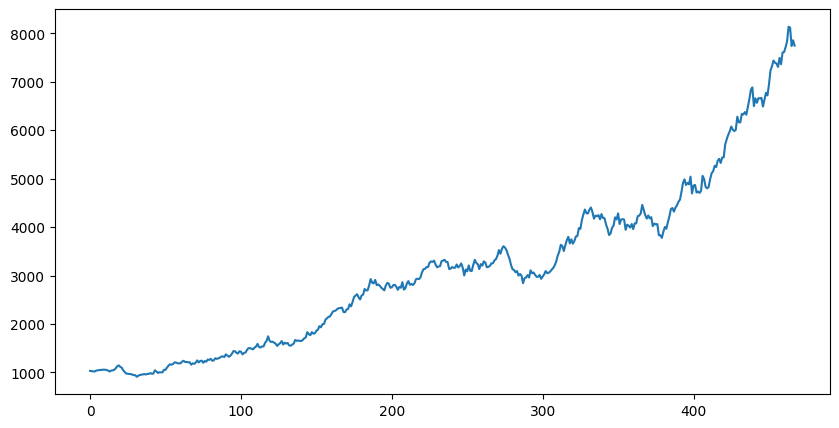

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(PVs)

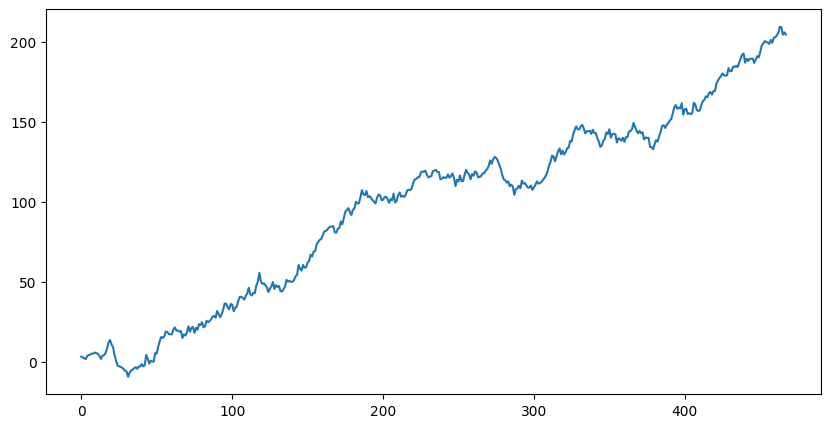

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(PFs)

In [11]:
print('MDD:', get_mdd(PVs))

MDD: 21.178889165952896
